In [23]:
import seaborn as sns
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

<h1>Exploratory Data Analysis<h1>

In [24]:
census = pd.read_csv("Family Income and Expenditure.csv")

In [ ]:
#getting the objects dtypes columns 
object_cols = census.select_dtypes(include=['object']).columns.tolist()
object_cols

#converting objects into category 
for column in object_cols:
    census[column] = census[column].astype('category')

census.dtypes.head(4)
census['Region'] = census['Region'].str.strip()  # Remove leading/trailing whitespace

census['percentage of food expenditure over household income'] = (census['Total Food Expenditure'] / census['Total Household Income']) * 100

census['total expenditure sa bisyo'] = census['Tobacco Expenditure'] + census['Alcoholic Beverages Expenditure']
census['percentage of bisyo over household income'] = (census['total expenditure sa bisyo'] / census['Total Household Income']) * 100



np.float64(1085.06812054689)

In [26]:
census['Total Household Income (monthly)'] = census['Total Household Income'] / 12
def classify_income(income):
    if income < 13873:
        return 'Poor'
    elif income < 28000:        
        return 'Low-Income (non-poor)'
    elif income < 55000:
        return 'Lower Middle-Income'
    elif income < 97000:
        return 'Middle Middle-Income'
    elif income < 166000:
        return 'Upper Middle-Income'
    elif income < 277000:
        return 'Upper-Income (non-rich)'
    else:
        return 'Rich'

# Apply it to your DataFrame
census['Income Class'] = census['Total Household Income (monthly)'].apply(classify_income)


In [27]:
luzon_list = [
    'CAR',                
    'NCR',                
    'I - Ilocos Region',
    'II - Cagayan Valley',
    'III - Central Luzon',
    'IVA - CALABARZON',
    'IVB - MIMAROPA',
    'V - Bicol Region'
]

luzon = census[census['Region'].isin(luzon_list)]

visayas_regions_list = ['VI - Western Visayas', 'VII - Central Visayas', 'VIII - Eastern Visayas']
visayas = census[census['Region'].isin(visayas_regions_list)]

# Now filter with clean comparison list
mindanao_regions_list = [
    'Caraga',
    'ARMM',
    'X - Northern Mindanao',
    'XI - Davao Region',
    'XII - SOCCSKSARGEN',
    'IX - Zamboanga Peninsula'
]

mindanao = census[census['Region'].isin(mindanao_regions_list)]

In [28]:
def assign_island_group(region):
    luzon = [
        'CAR', 'NCR', 'I - Ilocos Region', 'II - Cagayan Valley',
        'III - Central Luzon', 'IVA - CALABARZON',
        'IVB - MIMAROPA', 'V - Bicol Region'
    ]
    visayas = [
        'VI - Western Visayas', 'VII - Central Visayas', 'VIII - Eastern Visayas'
    ]
    mindanao = [
        'IX - Zamboanga Peninsula', 'X - Northern Mindanao',
        'XI - Davao Region', 'XII - SOCCSKSARGEN', 'Caraga', 'ARMM','IX - Zasmboanga Peninsula'
    ]
    
    if region in luzon:
        return 'Luzon'
    elif region in visayas:
        return 'Visayas'
    elif region in mindanao:
        return 'Mindanao'
    else:
        return 'Unknown'

# Apply the function to create a new column
census['Island Group'] = census['Region'].apply(assign_island_group)


<h2>What region have the highest number of poverty in different three main island<h2>

<h2>Insight 1. In all three major island groups – Luzon, Visayas, and Mindanao – the poorest segments of society represent the largest portion of the population.<h2>

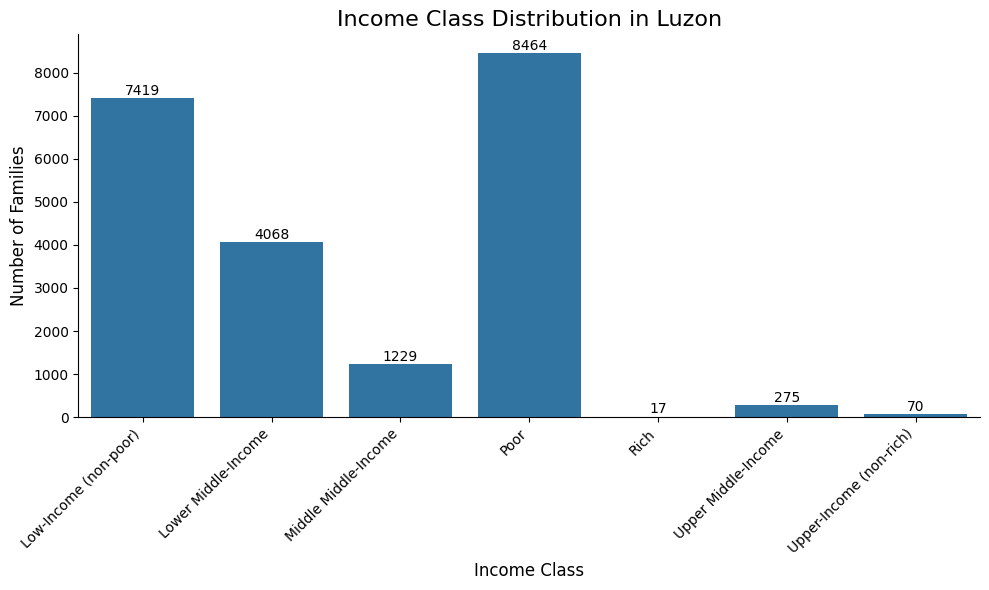

In [29]:
luzon_income_clas = luzon.groupby(['Income Class']).size()
plt.figure(figsize=(10, 6))
sns.barplot(x=luzon_income_clas.index, y=luzon_income_clas.values)

plt.title('Income Class Distribution in Luzon', fontsize=16)
plt.xlabel('Income Class', fontsize=12)
plt.ylabel('Number of Families', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

for index, value in enumerate(luzon_income_clas.values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

sns.despine()
plt.tight_layout()
plt.show()

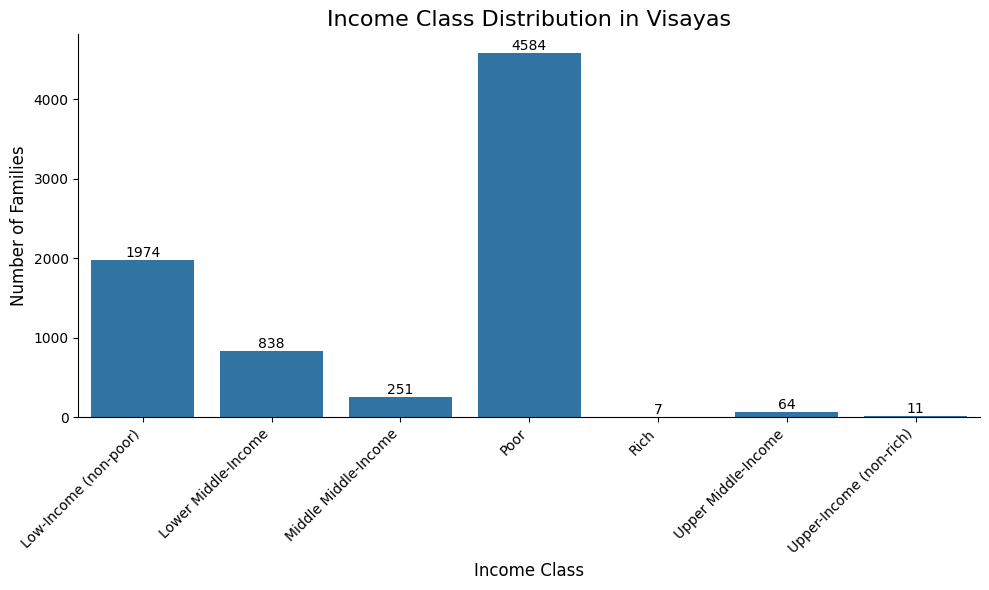

In [30]:
visayas_income_clas = visayas.groupby(['Income Class']).size()
plt.figure(figsize=(10, 6))
sns.barplot(x=visayas_income_clas.index, y=visayas_income_clas.values)

plt.title('Income Class Distribution in Visayas', fontsize=16)
plt.xlabel('Income Class', fontsize=12)
plt.ylabel('Number of Families', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

for index, value in enumerate(visayas_income_clas.values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

sns.despine()
plt.tight_layout()
plt.show()

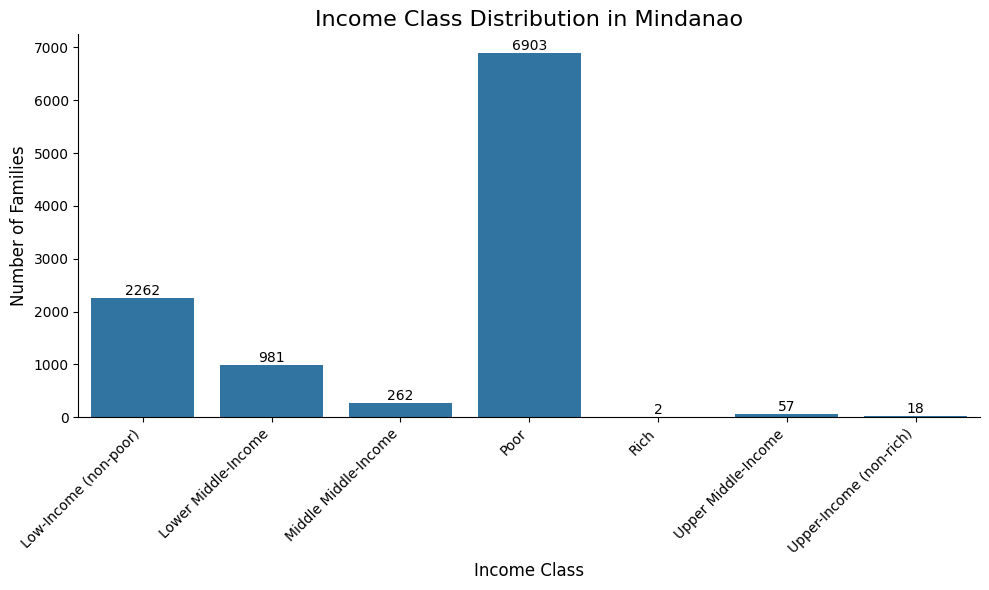

In [31]:
mindanao_income_clas = mindanao.groupby(['Income Class']).size()
plt.figure(figsize=(10, 6))
sns.barplot(x=mindanao_income_clas.index, y=mindanao_income_clas.values)

plt.title('Income Class Distribution in Mindanao', fontsize=16)
plt.xlabel('Income Class', fontsize=12)
plt.ylabel('Number of Families', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

for index, value in enumerate(mindanao_income_clas.values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

sns.despine()
plt.tight_layout()
plt.show()

<h2>Insight 2. With a poverty rate of 39.29%, a significant portion of Luzon's population is classified as living in poverty, although this is lower than the rates observed in Mindanao (65.83%) and Visayas (59.31%).<h2>

In [32]:
census['Island Group'].value_counts()

Island Group
Luzon       21542
Mindanao    12273
Visayas      7729
Name: count, dtype: int64

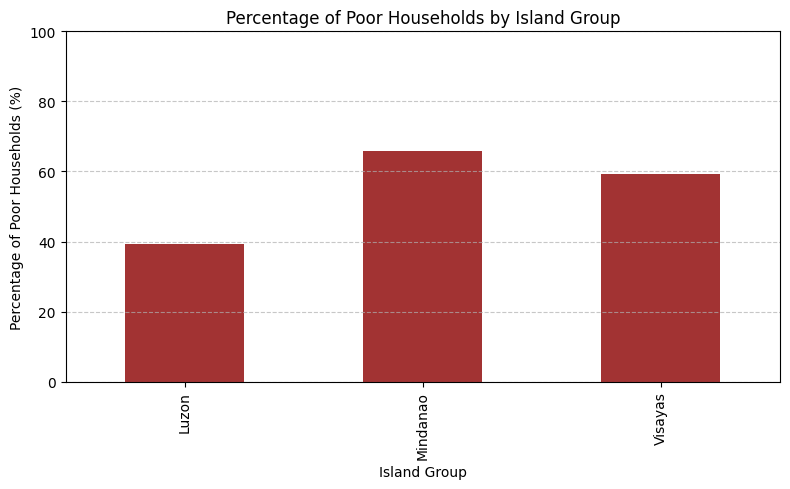

In [33]:
poor_households = census[census["Income Class"] == "Poor"]

total_by_island = census["Island Group"].value_counts()

poor_by_island = poor_households["Island Group"].value_counts()

poor_percentage = (poor_by_island / total_by_island * 100).round(2)

plt.figure(figsize=(8, 5))
poor_percentage.plot(kind="bar", color="darkred", alpha=0.8)
plt.title("Percentage of Poor Households by Island Group")
plt.xlabel("Island Group")
plt.ylabel("Percentage of Poor Households (%)")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

<h2>In luzon do NCR have the highest number of poverty?<h2>

<h2>Insight 3. Bicol Region has a high percentage of poor households in the Philippines, with 64.85% of households classified as poor. While it has a significant poverty rate, the data shows that MIMAROPA (Region IVB) has a slightly higher percentage of poor households in Luzon at 60.69%. <h2>

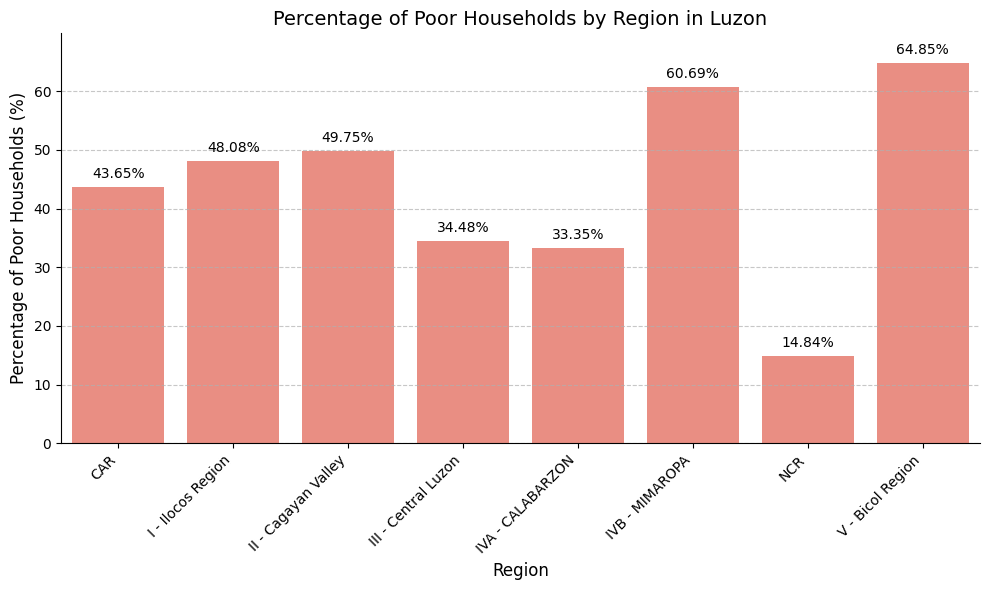

In [34]:
poor_households = luzon[luzon["Income Class"] == "Poor"]
total_by_region = luzon["Region"].value_counts()
poor_by_region = poor_households["Region"].value_counts()
poor_percentage_luzon = (poor_by_region / total_by_region * 100).round(2)

plt.figure(figsize=(10, 6))
sns.barplot(x=poor_percentage_luzon.index, y=poor_percentage_luzon.values, color="salmon")

plt.title("Percentage of Poor Households by Region in Luzon", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Percentage of Poor Households (%)", fontsize=12)
plt.ylim(0, poor_percentage_luzon.max() + 5)  # Adjust y-axis limit
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add value labels on top of the bars
for index, value in enumerate(poor_percentage_luzon.values):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', va='bottom', fontsize=10)

sns.despine()
plt.tight_layout()
plt.show()

<h2>Finding out what is main source of income of an average bicolano<h2>

<h3>Insight 4: In Bicol, most people (1022 households) rely on wages or salaries for income. A good number also run their own small businesses (584 households), while a significant portion (866 households) depend on other income like remittances or aid. Given Bicol's high poverty rate, these numbers suggest that for many families, their earnings from jobs, businesses, or other sources aren't enough to escape poverty.<h3>

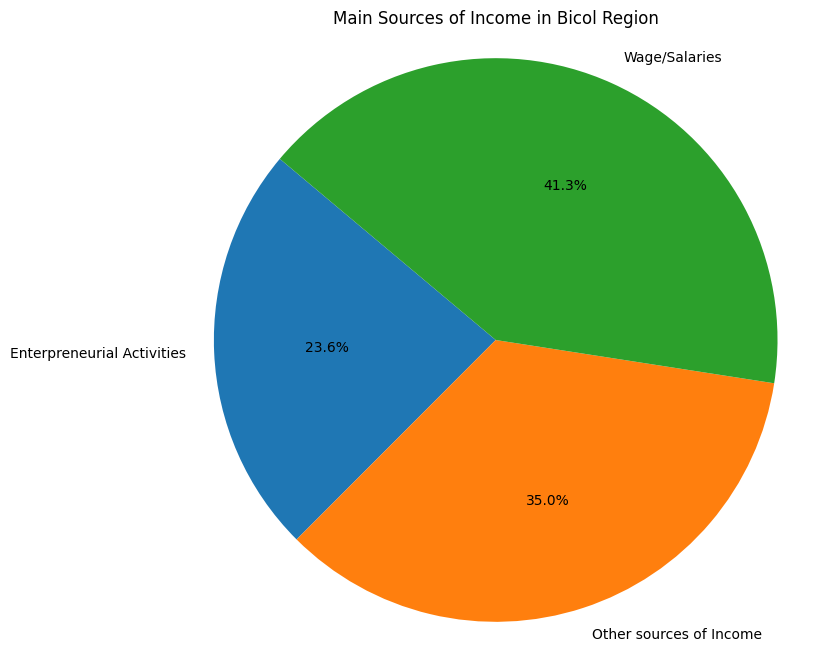

In [35]:
bicol = luzon[luzon['Region'] == 'V - Bicol Region']

main_source_bicol = bicol.groupby(['Main Source of Income']).size()
plt.figure(figsize=(8, 8))  # Adjust figure size for better readability
plt.pie(main_source_bicol,
        labels=main_source_bicol.index,
        autopct='%1.1f%%',
        startangle=140)

plt.title('Main Sources of Income in Bicol Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<h2>Total food expenditure of bicolano <h2>

<h2>Insight 5. People in the Bicol Region spend a much larger share of their income on food (about 51%) than in other parts of Luzon, which might mean more people there have difficulty meeting their basic needs.h2>

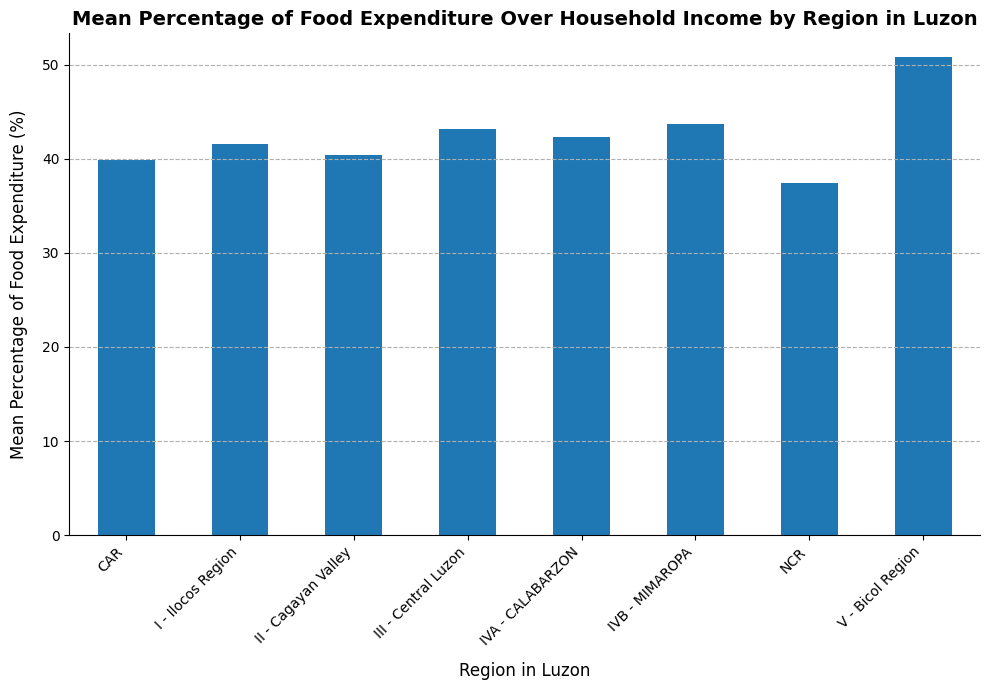

In [82]:
total_food_expense_luzon = luzon.groupby(['Region'])['percentage of food expenditure over household income'].mean()
plt.figure(figsize=(10,7))

total_food_expense_luzon.plot(kind='bar')

plt.xlabel('Region in Luzon', fontsize=12, labelpad=10)
plt.ylabel('Mean Percentage of Food Expenditure (%)', fontsize=12, labelpad=10)
plt.title('Mean Percentage of Food Expenditure Over Household Income by Region in Luzon', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)


plt.grid(axis='y', linestyle='--')
sns.despine()
plt.tight_layout()
plt.show()

<h2>What is the most common household class of worker in bicol region<h2>

<h2>Insight 6: Over 53% of these household heads are self-employed without employees, highlighting a significant reliance on independent livelihoods.<h2>

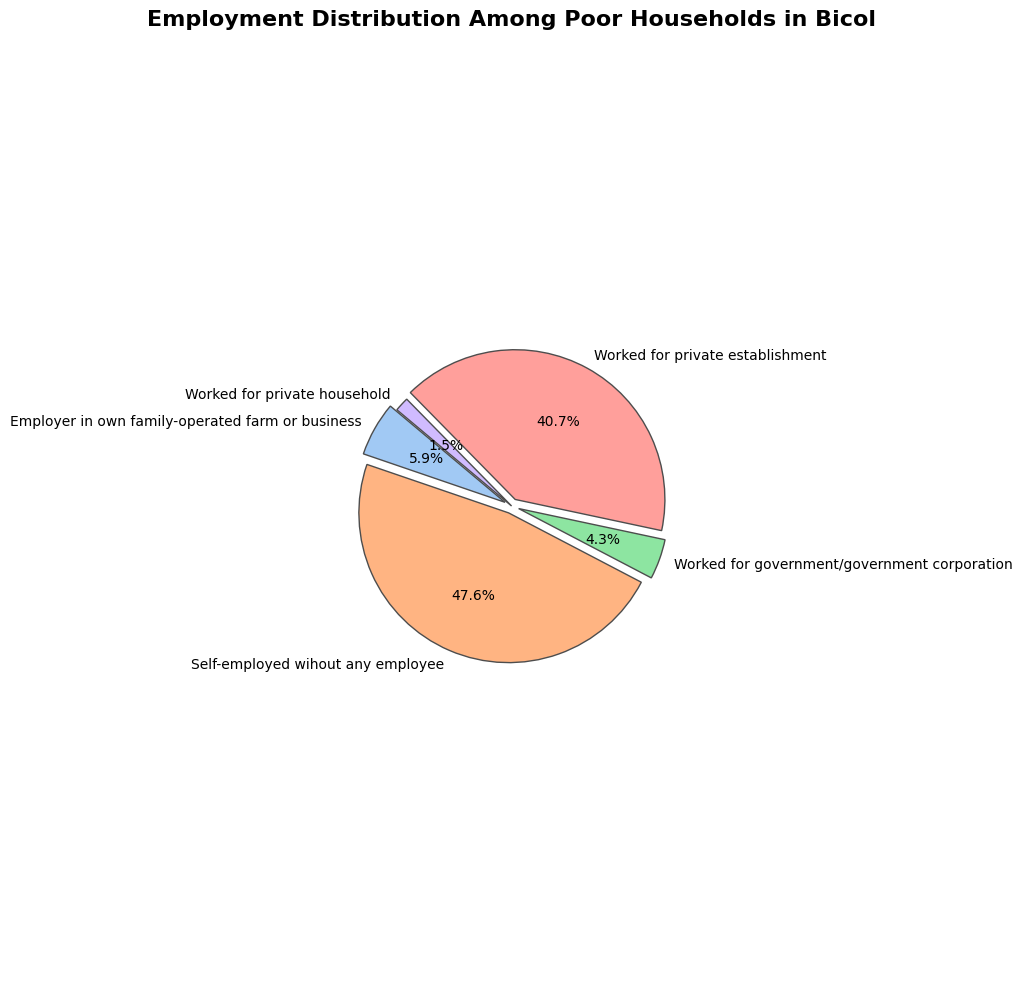

In [100]:


poor_household_bicol = bicol[bicol['Income Class'] == 'Poor']
jobs_in_bicol = poor_household_bicol.groupby(['Household Head Class of Worker']).size().head(5)

plt.figure(figsize=(10, 10))
sns.set_palette("pastel")

patches, texts, autotexts = plt.pie(jobs_in_bicol,
                                     labels=jobs_in_bicol.index,
                                     autopct='%1.1f%%',
                                     startangle=140,
                                     explode=[0.05 if count > jobs_in_bicol.quantile(0.1) else 0 for count in jobs_in_bicol.values],
                                     wedgeprops={'edgecolor': '0.3'})

plt.title('Employment Distribution Among Poor Households in Bicol', fontsize=16, fontweight='bold')
plt.axis('equal')

for text in texts:
    text.set_fontsize(10)
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_color('black')

sns.despine(left=True, bottom=True, right=True)
plt.tight_layout()
plt.show()

<h2>island with the highest number of percentage of bad habit expenditure over total income<h2>

<h2>Insight 7: Visayas shows the highest average percentage of household income spent on vices at 2.22%, compared to 1.99% in Mindanao and 1.87% in Luzon.<h2>

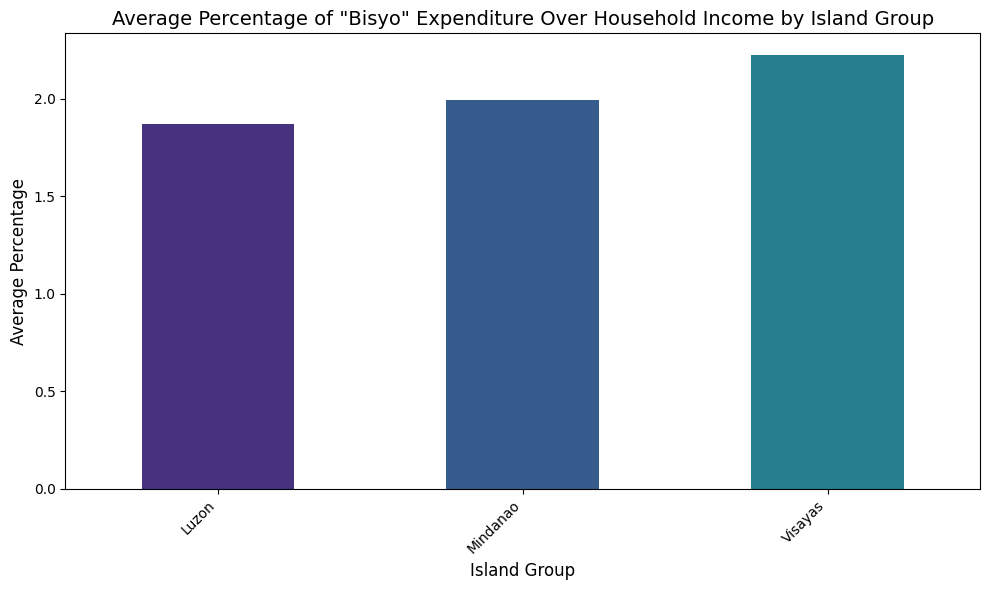

In [119]:
island_group_bisyo = census.groupby(['Island Group'])['percentage of bisyo over household income'].mean()

plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
island_group_bisyo.plot(kind='bar', color=sns.color_palette("viridis")) # Use a visually appealing color palette
plt.title('Average Percentage of "Bisyo" Expenditure Over Household Income by Island Group', fontsize=14)
plt.xlabel('Island Group', fontsize=12)
plt.ylabel('Average Percentage', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10) # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


<h2>top earning occupation<h2>

<h2>Insight 8: Accountants and Auditors, as well as Editors (Advertising and Public Relations Managers), earn the highest annual wage at around 600,000 pesos , which translates to approximately 50,000 pesos monthly .<h2>

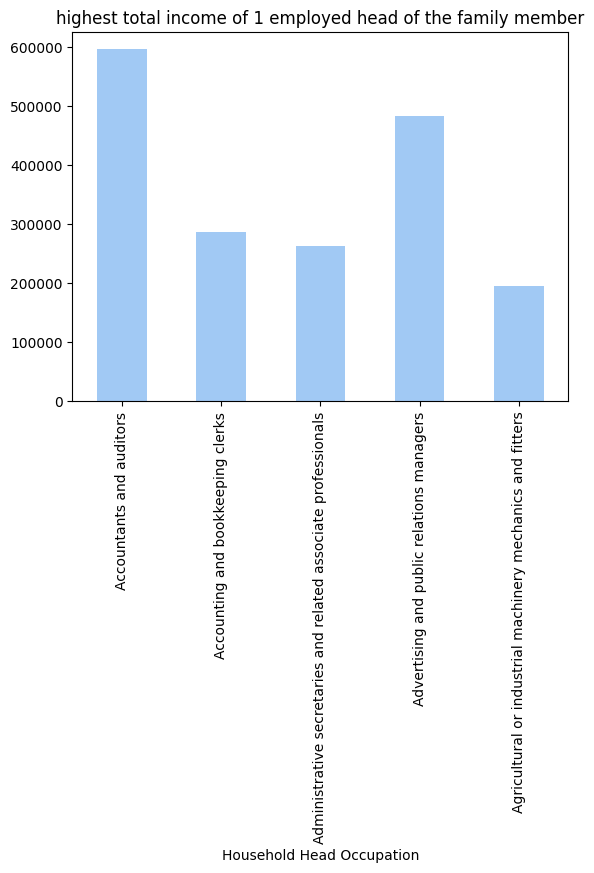

In [123]:
#steven
census['Household Head Occupation'].value_counts()
income_head = census.groupby(['Household Head Occupation'])['Total Household Income'].mean()
income_head

#dito makikita natin na ang may pinakamalaking household na sweldo ay ang mga accountants saka auditor yan yung total bali try natin yung 
#iisa lang ang employe sa familya 
#ok still auditor 
soloworker = census[census['Total number of family members employed'] == 1]
income_head_solo = soloworker.groupby(['Household Head Occupation'])['Total Household Income'].mean().head()
income_head_solo.plot(kind='bar')
plt.title('highest total income of 1 employed head of the family member')
plt.show()

<h2>average food expenses daily<h2>

<h2>Insigh 9: Even though family sizes vary, daily food expenditures among poor households remain relatively low regardless of the number of family members. This suggests that poor families are making ends meet by keeping food spending minimal, often having to stretch limited resources (e.g., around ₱200 to ₱500 per day ) regardless of household size.<h2>

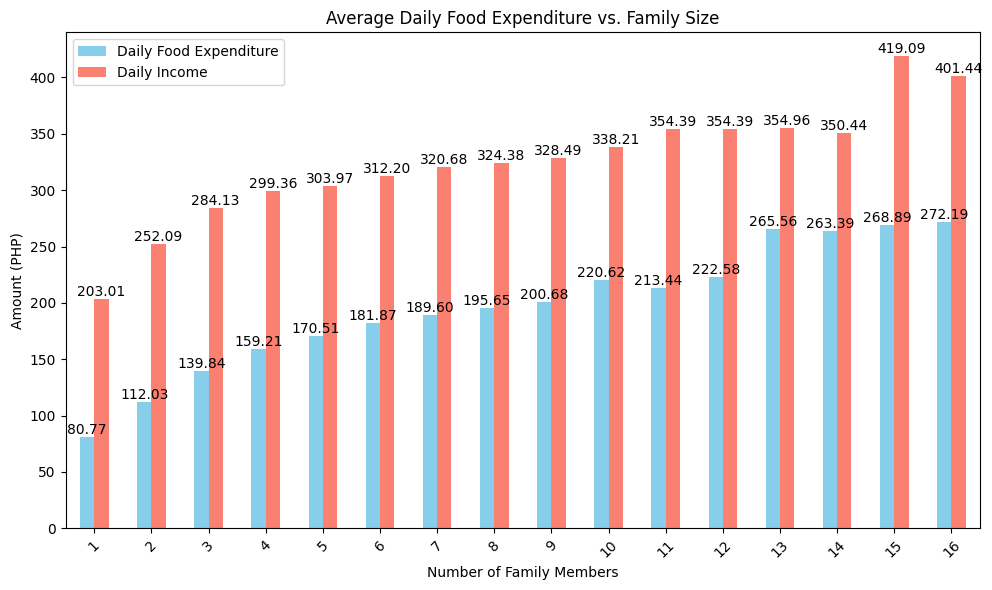

In [139]:
# Filter for 'Poor' income class and calculate daily metrics
poor = census[census['Income Class'] == 'Poor']
poor['daily_food'] = poor['Total Food Expenditure'] / 365
poor['daily_income'] = poor['Total Household Income'] / 365

# Group by family size and compute average food and income
grouped = poor.groupby('Total Number of Family members')[['daily_food', 'daily_income']].mean()

# Plot the comparison
ax = grouped.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Average Daily Food Expenditure vs. Family Size')
plt.xlabel('Number of Family Members')
plt.ylabel('Amount (PHP)')
plt.xticks(rotation=45)
plt.legend(['Daily Food Expenditure', 'Daily Income'])
plt.tight_layout()

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')

plt.show()

<h2>Even One Child: The Struggle of Poor Families to Afford Education"<h2>

<h2>Insight 10<h2>
<h3>Even in families with only one child, poor households spend significantly less on education annually — an average of just ₱1,682.90 — compared to other income groups. This stark gap reflects how poverty limits access to educational opportunities, as poor families are often forced to prioritize basic needs like food, shelter, and healthcare over schooling .

This limited investment in education can lead to long-term consequences, such as lower academic performance , higher dropout rates , and limited future earning potential , which makes it harder for these families to break the cycle of poverty.<h3>

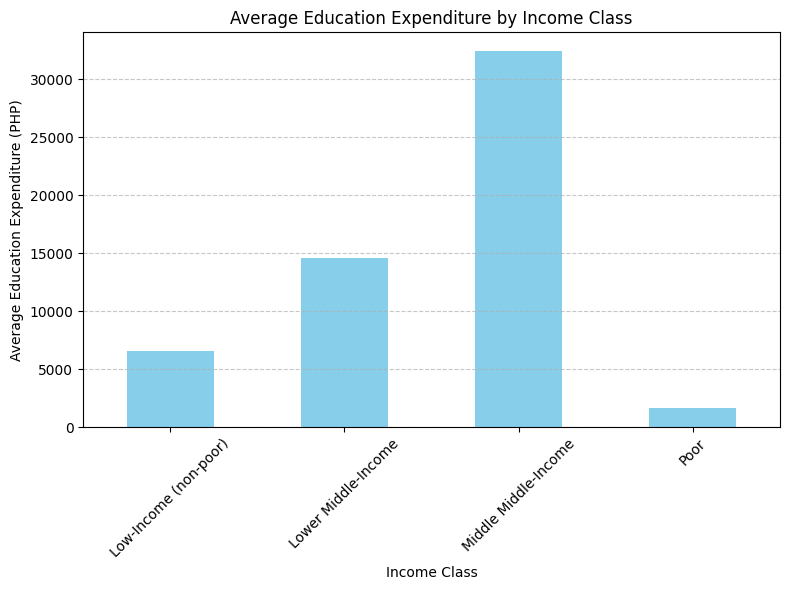

In [153]:
#do poor families with family member of 5 to 17 support education
student = census[census['Members with age 5 - 17 years old'] > 0]
student = census[census['Total Number of Family members'] == 3]
student_income_class = student.groupby(['Income Class'])['Education Expenditure'].mean().head(4)

student_income_class.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Average Education Expenditure by Income Class')
plt.xlabel('Income Class')
plt.ylabel('Average Education Expenditure (PHP)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [154]:
student_income_class

Income Class
Low-Income (non-poor)     6520.221386
Lower Middle-Income      14583.596532
Middle Middle-Income     32417.330709
Poor                      1682.902686
Name: Education Expenditure, dtype: float64

<h2>1. Regional Cost of Living: Where Survival Is Hardest</h2>


In [38]:
#jp1  (example update ni steven)

<h2>2. The Regional “Saving Gap”: Which Regions Can Actually Save?</h2>


In [39]:
#jp2

<h2>3. Are Rural or Urban Households More Financially Vulnerable?</h2>


In [40]:
#jp3

<h2>4. The Hidden Poverty Behind the Walls</h2>


In [41]:
#jp4

<h2>5. “Imputed Rental” Inequality</h2>


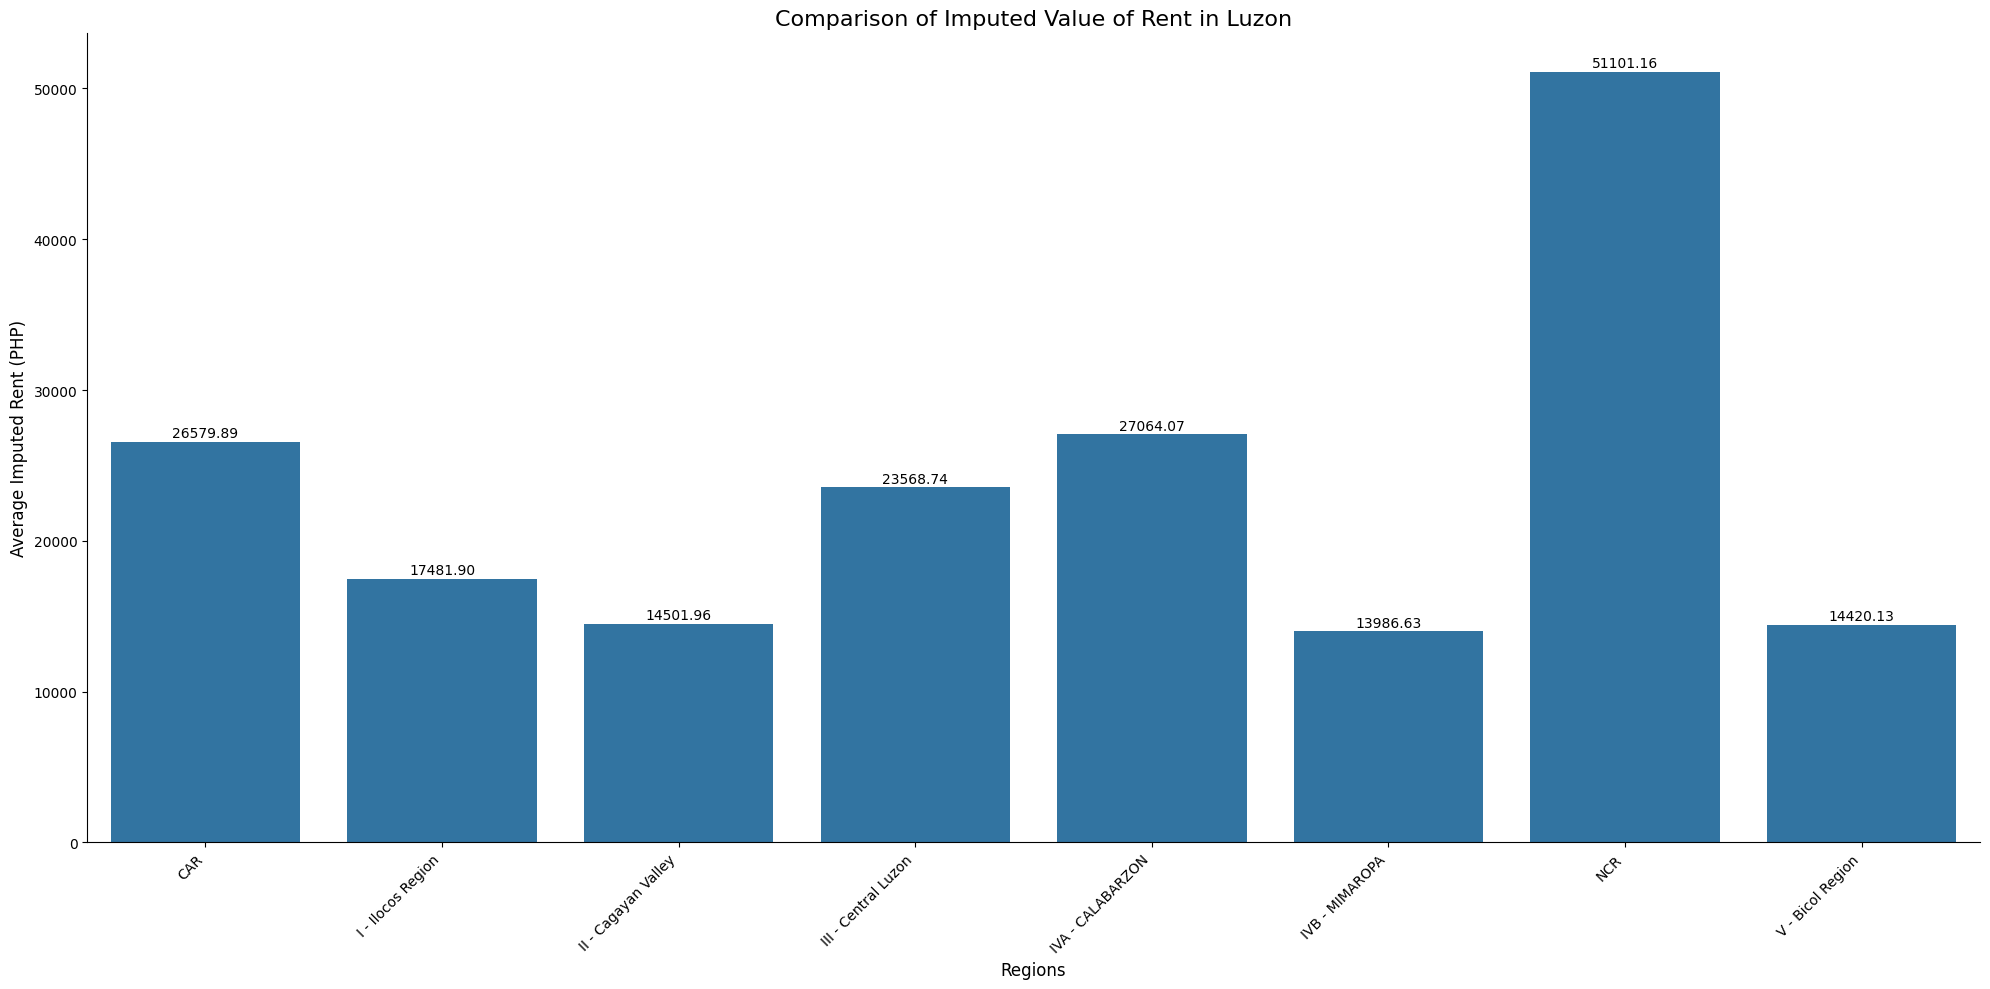

In [42]:
imputed_rental_per_region_luzon = luzon.groupby('Region')['Imputed House Rental Value'].mean()

plt.figure(figsize=(20, 10))  # Increased height for better label visibility
sns.barplot(x=imputed_rental_per_region_luzon.index, y=imputed_rental_per_region_luzon.values)

plt.title('Comparison of Imputed Value of Rent in Luzon', fontsize=16)
plt.xlabel('Regions', fontsize=12)
plt.ylabel('Average Imputed Rent (PHP)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate and align labels

# Add value labels on top of the bars
for index, value in enumerate(imputed_rental_per_region_luzon.values):
    plt.text(index, value + 100, f'{value:.2f}', ha='center', va='bottom', fontsize=10)  # Format values

sns.despine()
plt.tight_layout()
plt.show()

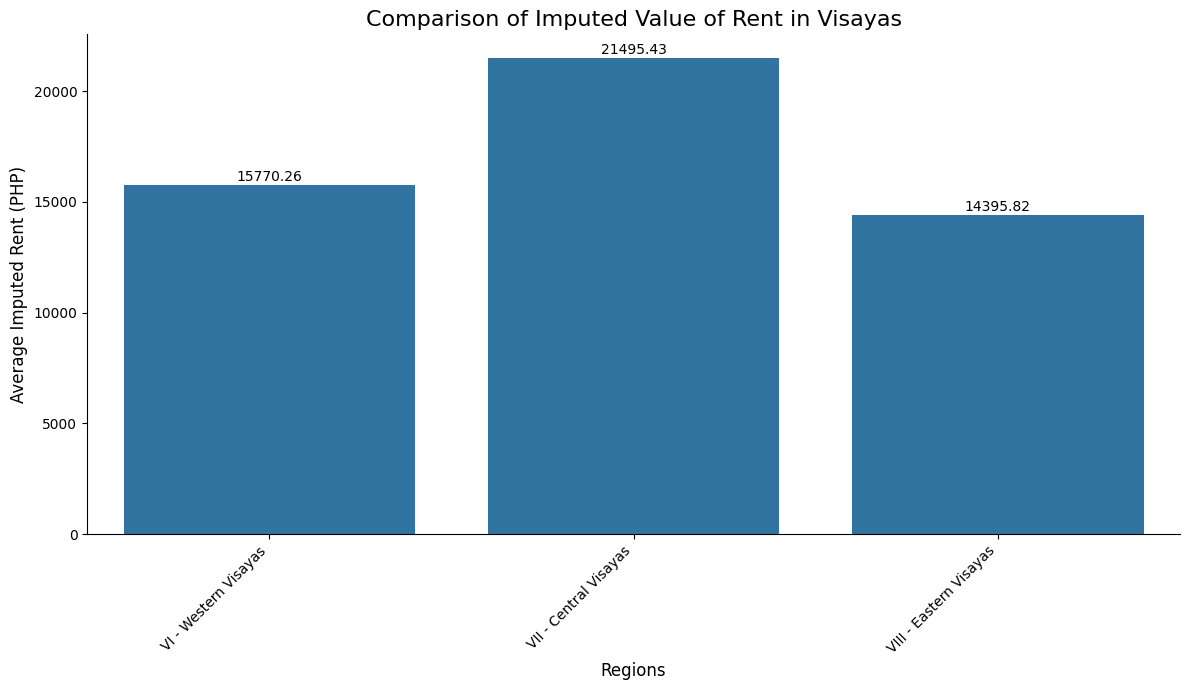

In [43]:
imputed_rental_per_region_visayas = visayas.groupby(['Region'])['Imputed House Rental Value'].mean()

plt.figure(figsize=(12, 7))  # Adjust figure size for better readability
sns.barplot(x=imputed_rental_per_region_visayas.index, y=imputed_rental_per_region_visayas.values)

plt.title('Comparison of Imputed Value of Rent in Visayas', fontsize=16)
plt.xlabel('Regions', fontsize=12)
plt.ylabel('Average Imputed Rent (PHP)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add value labels on top of the bars
for index, value in enumerate(imputed_rental_per_region_visayas.values):
    plt.text(index, value + 50, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

sns.despine()
plt.tight_layout()
plt.show()

['Caraga' 'ARMM' 'X - Northern Mindanao' 'XI - Davao Region'
 'XII - SOCCSKSARGEN']


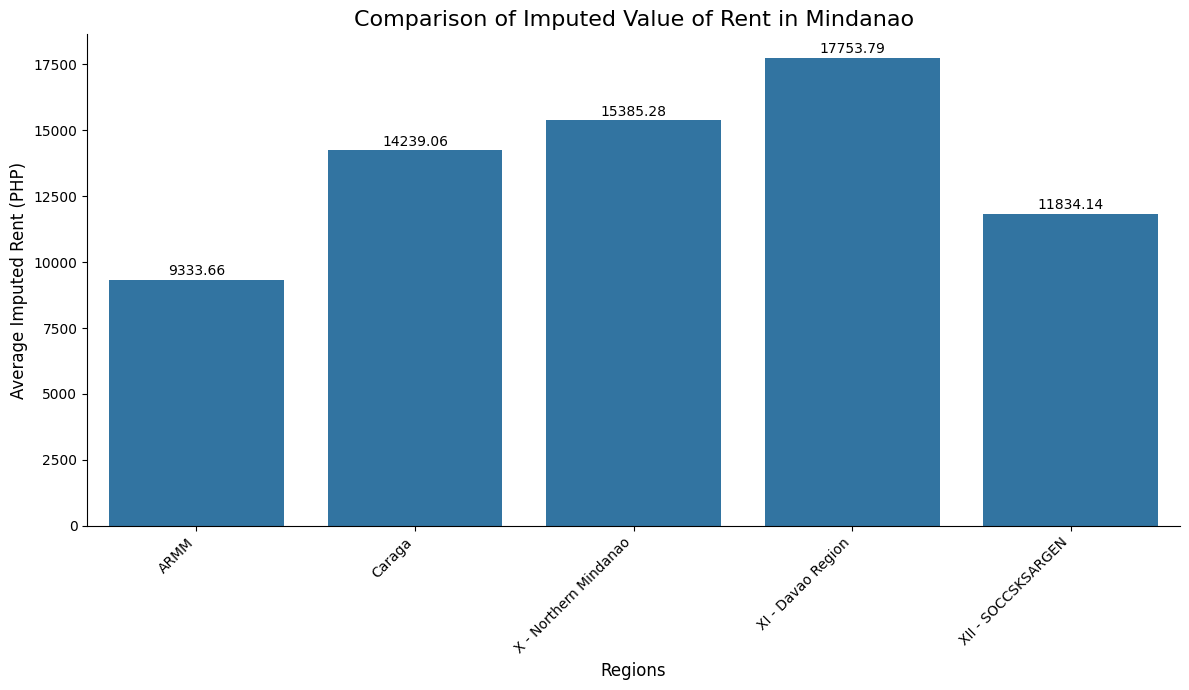

In [44]:
# Debugging check (as in your original code)
print(mindanao['Region'].unique())

# Group by region and calculate the mean imputed rental value
imputed_rental_per_region_mindanao = mindanao.groupby('Region')['Imputed House Rental Value'].mean()

# --- Enhanced Plotting with Seaborn ---
plt.figure(figsize=(12, 7))
sns.barplot(x=imputed_rental_per_region_mindanao.index, y=imputed_rental_per_region_mindanao.values)

plt.title('Comparison of Imputed Value of Rent in Mindanao', fontsize=16)
plt.xlabel('Regions', fontsize=12)
plt.ylabel('Average Imputed Rent (PHP)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add value labels on top of the bars
for index, value in enumerate(imputed_rental_per_region_mindanao.values):
    plt.text(index, value + 50, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

sns.despine()
plt.tight_layout()

<h2>6. Toilet & Water Access as a Poverty Indicator</h2>


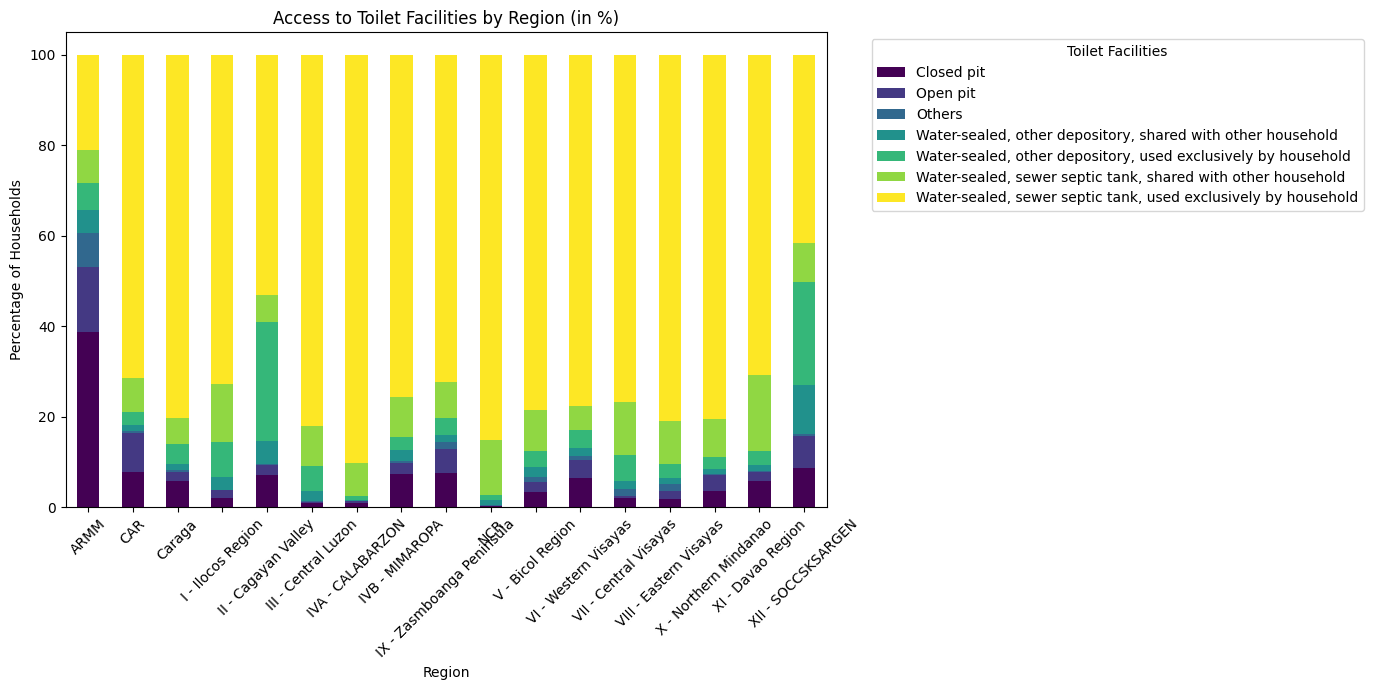

In [45]:
toilet_region = census.groupby(['Region', 'Toilet Facilities']).size().unstack().fillna(0)

# Normalize to percent per region (optional for comparison)
toilet_region_percent = toilet_region.div(toilet_region.sum(axis=1), axis=0) * 100

# Plot
toilet_region_percent.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
plt.title('Access to Toilet Facilities by Region (in %)')
plt.xlabel('Region')
plt.ylabel('Percentage of Households')
plt.xticks(rotation=45)
plt.legend(title='Toilet Facilities', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


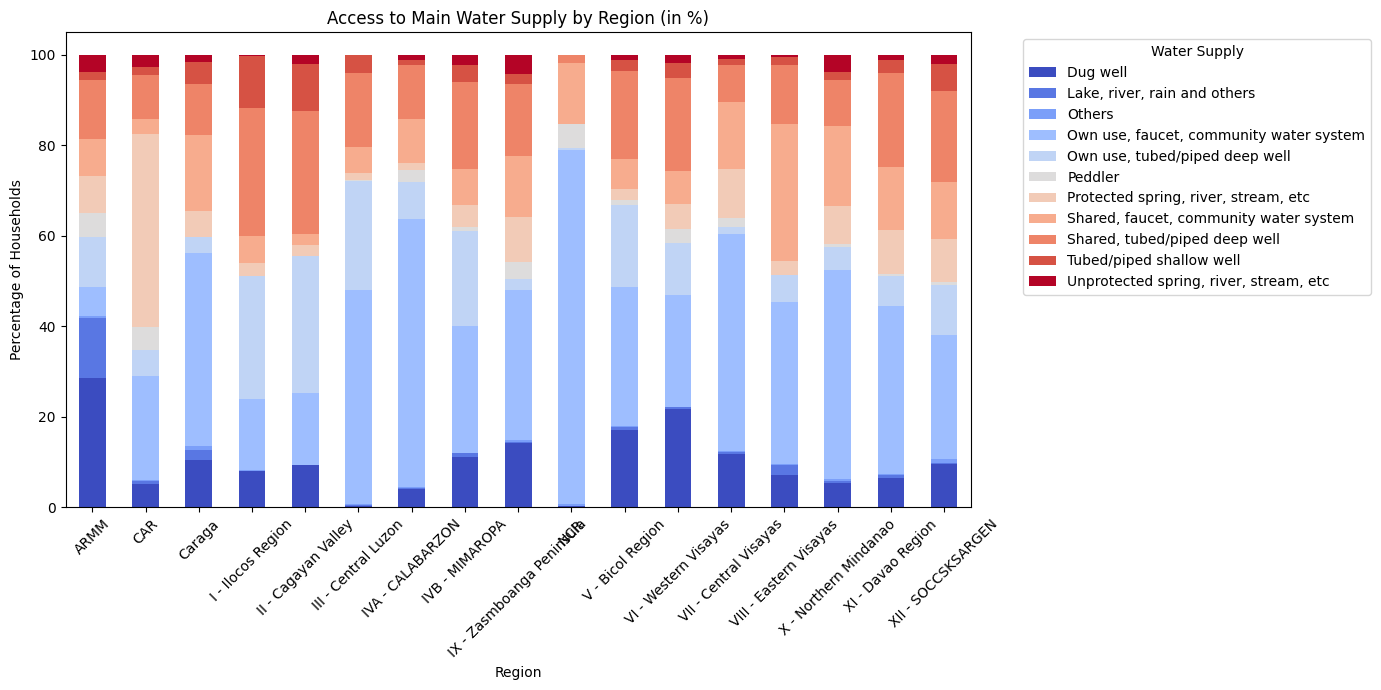

In [142]:
water_region = census.groupby(['Region', 'Main Source of Water Supply']).size().unstack().fillna(0)
water_region_percent = water_region.div(water_region.sum(axis=1), axis=0) * 100

# Plot
water_region_percent.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='coolwarm')
plt.title('Access to Main Water Supply by Region (in %)')
plt.xlabel('Region')
plt.ylabel('Percentage of Households')
plt.xticks(rotation=45)
plt.legend(title='Water Supply', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<h2>7. Large Families, Small Budgets</h2>


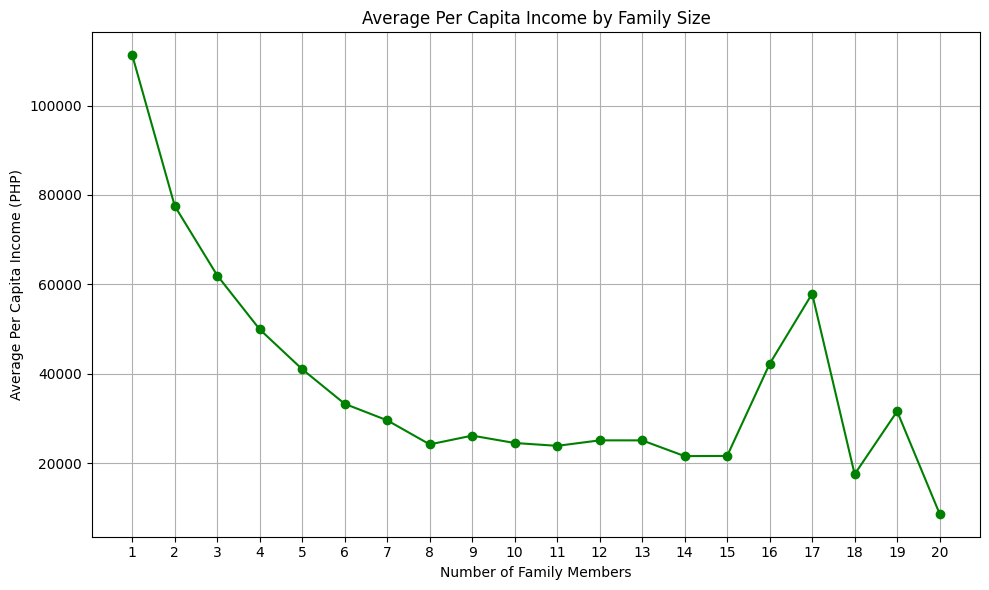

In [122]:
# Avoid division by zero
luzon = mindanao[mindanao['Total Number of Family members'] > 0].copy()
mindanao['Per Capita Income'] = mindanao['Total Household Income'] / mindanao['Total Number of Family members']

# Average per capita income by family size
avg_per_capita = mindanao.groupby('Total Number of Family members')['Per Capita Income'].mean()

# Plot
plt.figure(figsize=(10, 6))
avg_per_capita.plot(kind='line', marker='o', color='green')
plt.title('Average Per Capita Income by Family Size')
plt.xlabel('Number of Family Members')
plt.ylabel('Average Per Capita Income (PHP)')
plt.grid(True)
plt.xticks(avg_per_capita.index) 
plt.tight_layout()
plt.show()


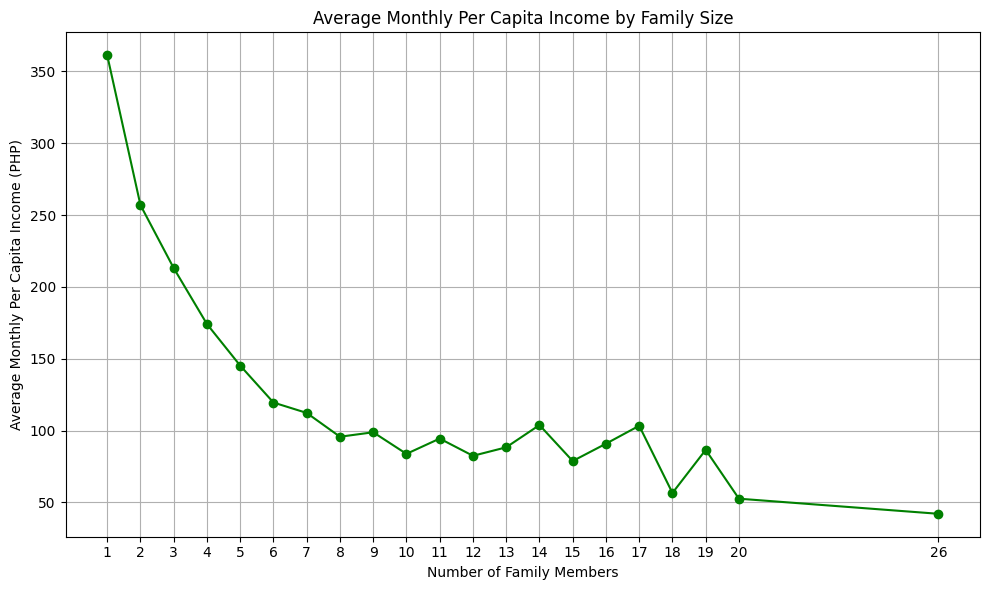

In [125]:
# Avoid division by zero
census = census[census['Total Number of Family members'] > 0].copy()

# Calculate monthly per capita income
census['Per Capita Income (Monthly)'] = census['Per Capita Income'] / 12

census['Per Capita Income (daily)'] = census['Per Capita Income'] / 365

# Average monthly per capita income by family size
avg_per_capita_monthly = census.groupby('Total Number of Family members')['Per Capita Income (daily)'].mean()

# Plot
plt.figure(figsize=(10, 6))
avg_per_capita_monthly.plot(kind='line', marker='o', color='green')
plt.title('Average Monthly Per Capita Income by Family Size')
plt.xlabel('Number of Family Members')
plt.ylabel('Average Monthly Per Capita Income (PHP)')
plt.grid(True)
plt.xticks(avg_per_capita_monthly.index)
plt.tight_layout()
plt.show()


<h2>8. Does Education Suffer with More Kids?</h2>


In [49]:
#jp5

<h2>9. Child-Heavy Households and Poverty Correlation</h2>


In [50]:
# #steven
# # Optional: Filter out invalid family sizes
# census = census[census['Total Number of Family members'] > 0]

# # Create Child-Heavy Flag
# census['Child-Heavy'] = census['Members with age less than 5 year old'] >= 3

# # Poverty flag (already defined)
# # census['Poverty Status'] = census['Total Household Income'] < poverty_threshold

# # Cross-tabulation of Poverty vs Child-Heavy
# child_poverty = pd.crosstab(census['Child-Heavy'], census['Poverty Status'])

# # Normalize to get percentages
# child_poverty_percent = child_poverty.div(child_poverty.sum(axis=1), axis=0) * 100

# # Plot
# child_poverty_percent.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Set2')
# plt.title('Poverty Status by Child-Heavy Households')
# plt.xlabel('Child-Heavy Household (3 or more children)')
# plt.ylabel('Percentage of Households')
# plt.xticks([0, 1], ['Not Child-Heavy', 'Child-Heavy'], rotation=0)
# plt.tight_layout()
# plt.show()


<h2>10. Who Are the Working Poor?</h2>


In [51]:
#steven

<h2>11. Entrepreneurial Families: Are They Better Off?</h2>


<Axes: xlabel='Main Source of Income'>

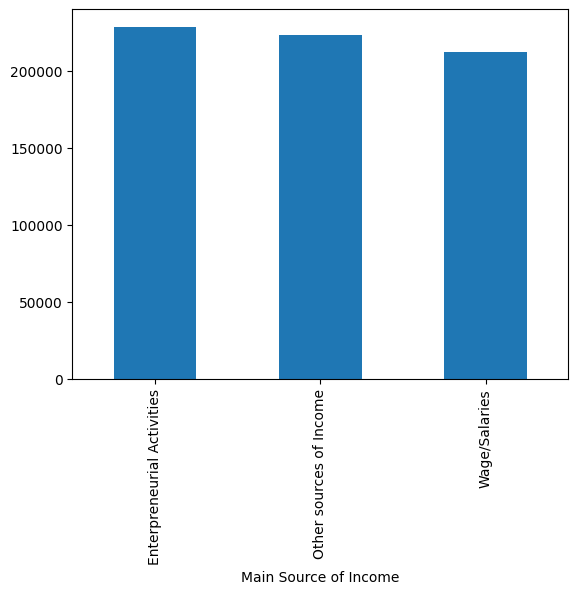

In [52]:
#steven

#are are only slight difference between the total numner ob household income in one employed doing entreprenuerial activies 
entreprenuer = census[census['Total Income from Entrepreneurial Acitivites'] != 0 ]
entreprenuer = entreprenuer[entreprenuer['Total number of family members employed']  == 1]
#kinita pera ng wage salaries compare sa entreprenuers 

entrep_main = entreprenuer.groupby(['Main Source of Income'])['Total Household Income'].mean()

entrep_main.plot(kind='bar')

<h2>12. Occupation vs. Income Ranking</h2>


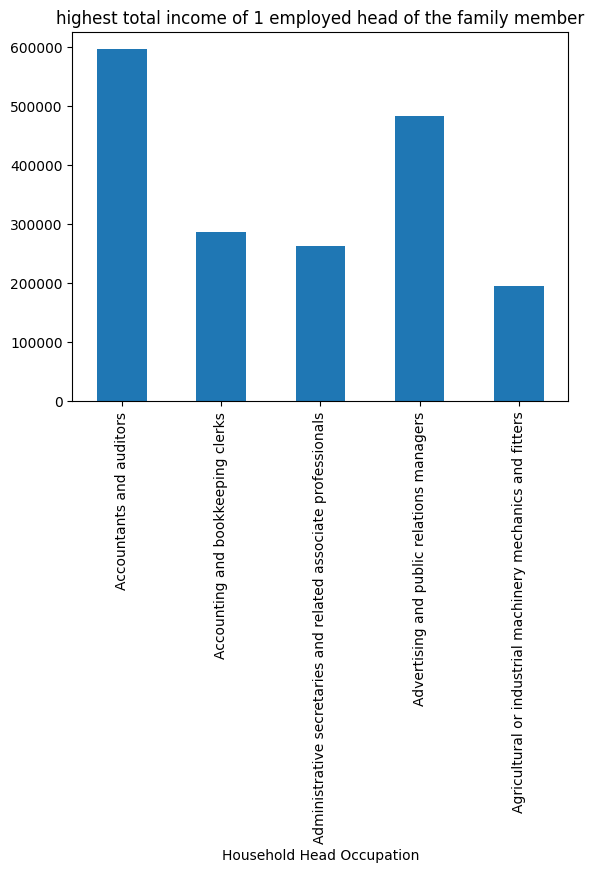

In [53]:
#steven
census['Household Head Occupation'].value_counts()
income_head = census.groupby(['Household Head Occupation'])['Total Household Income'].mean()
income_head

#dito makikita natin na ang may pinakamalaking household na sweldo ay ang mga accountants saka auditor yan yung total bali try natin yung 
#iisa lang ang employe sa familya 
#ok still auditor 
soloworker = census[census['Total number of family members employed'] == 1]
income_head_solo = soloworker.groupby(['Household Head Occupation'])['Total Household Income'].mean().head()
income_head_solo.plot(kind='bar')
plt.title('highest total income of 1 employed head of the family member')
plt.show()

In [54]:
census['Household Head Class of Worker'].value_counts()

Household Head Class of Worker
Self-employed wihout any employee                             13766
Worked for private establishment                              13731
Worked for government/government corporation                   2820
Employer in own family-operated farm or business               2581
Worked for private household                                    811
Worked without pay in own family-operated farm or business      285
Worked with pay in own family-operated farm or business          14
Name: count, dtype: int64

<h2>Mas alchoholic ba ang mga mahihirap at mabibisyo ba ang mahihirap kesa sa mayaman?<h2>

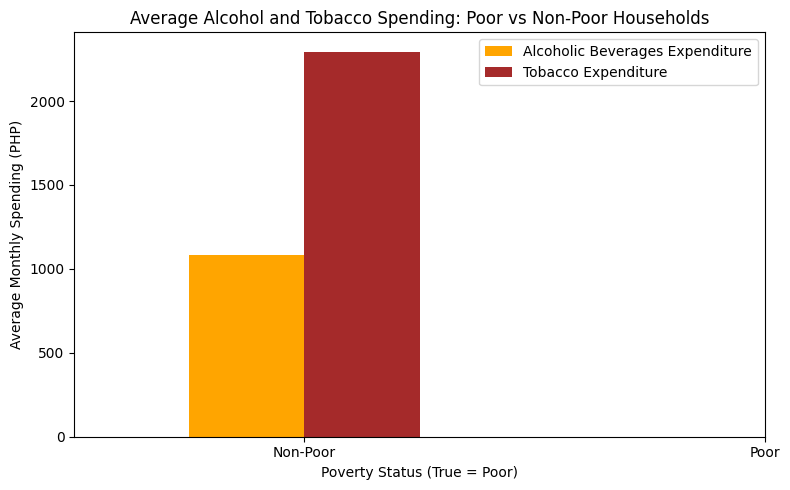

In [55]:
# Make sure 'Poverty Status' exists
poverty_threshold = 10000
census['Poverty Status'] = census['Total Household Income'] < poverty_threshold

# Group by Poverty Status and calculate mean expenditures
alcohol_tobacco = census.groupby('Poverty Status')[
    ['Alcoholic Beverages Expenditure', 'Tobacco Expenditure']
].mean()

# Plot absolute spending
alcohol_tobacco.plot(kind='bar', figsize=(8, 5), color=['orange', 'brown'])
plt.title('Average Alcohol and Tobacco Spending: Poor vs Non-Poor Households')
plt.xlabel('Poverty Status (True = Poor)')
plt.ylabel('Average Monthly Spending (PHP)')
plt.xticks([0, 1], ['Non-Poor', 'Poor'], rotation=0)
plt.tight_layout()
plt.show()


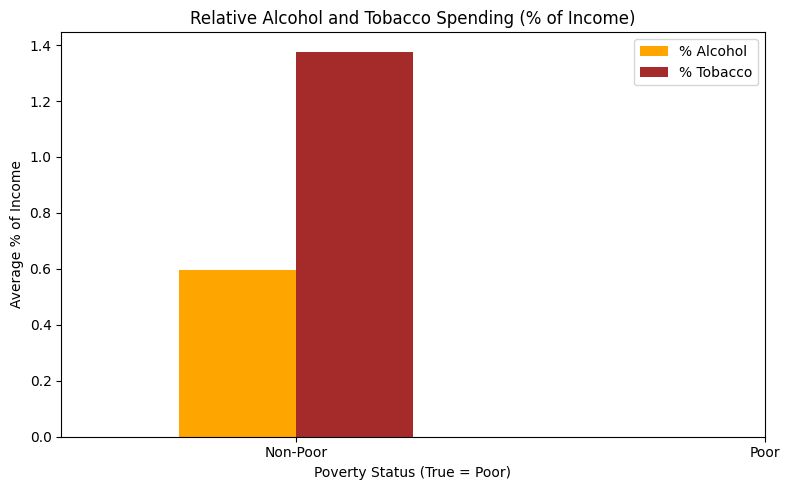

In [56]:
# Avoid division by zero
census = census[census['Total Household Income'] > 0]
census['Poverty Status'] = census['Total Household Income'] < poverty_threshold

# Compute percentage of income spent on alcohol and tobacco
census['% Alcohol'] = census['Alcoholic Beverages Expenditure'] / census['Total Household Income'] * 100
census['% Tobacco'] = census['Tobacco Expenditure'] / census['Total Household Income'] * 100

# Compare averages
relative_spending = census.groupby('Poverty Status')[['% Alcohol', '% Tobacco']].mean()

# Plot percentage spending
relative_spending.plot(kind='bar', figsize=(8, 5), color=['orange', 'brown'])
plt.title('Relative Alcohol and Tobacco Spending (% of Income)')
plt.xlabel('Poverty Status (True = Poor)')
plt.ylabel('Average % of Income')
plt.xticks([0, 1], ['Non-Poor', 'Poor'], rotation=0)
plt.tight_layout()
plt.show()


<h2>13. Food vs. Vices</h2>


In [57]:
#steven

<h2>14. Education vs. Entertainment Spending</h2>


In [58]:
#jp6

<h2>15. Medical vs. Special Occasions: What Hurts Families Most?</h2>


In [59]:
#jp7

<h2>16. Digital Divide Across Regions</h2>


In [60]:
#steven



<h2>17. Are Airconditioners and Cars a Sign of Wealth?</h2>


In [61]:
#jp8

<h2>18. Appliance Ownership vs. Basic Needs</h2>


In [62]:
#steven

<h2>19. Does the Head’s Education Affect Household Income?</h2>


In [63]:
#steven

<h2>20. Are Educated Heads Better at Budgeting?</h2>


In [64]:
#steven 

<h2>21. The “Invisible Rich”: Low Income, High Assets</h2>


In [65]:
#steven

<h2>22. High Expenditure, Low Income = Debt?</h2>


In [66]:
#steven

<h2>23. Senior-Headed Households: Are They Poorer?</h2>


In [67]:
#steven

<h2>24. Gender and Poverty</h2>


In [68]:
#jp9

<h2>25. Who Spends More on Transportation?</h2>


In [69]:
#jp10